<a href="https://colab.research.google.com/github/Devbrat-Singh/Image_Classification/blob/main/ImageClassification_using_ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls /content/drive/MyDrive


'Colab Notebooks'   dogs_vs_cats.zip   MajorProject


In [3]:
!unzip /content/drive/MyDrive/dogs_vs_cats.zip -d /content/dogs_vs_cats


Streaming output truncated to the last 5000 lines.
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4419.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.442.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4420.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4421.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4422.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4424.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4425.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4426.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4427.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4431.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4433.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4436.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [9]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/dogs_vs_cats/dogs_vs_cats/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/dogs_vs_cats/dogs_vs_cats/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

In [11]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator
        )

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 188s 276ms/step - accuracy: 0.8291 - loss: 0.3853 - val_accuracy: 0.8950 - val_loss: 0.2419
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.9027 - loss: 0.2356 - val_accuracy: 0.9128 - val_loss: 0.2050
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 266ms/step - accuracy: 0.9058 - loss: 0.2212 - val_accuracy: 0.9154 - val_loss: 0.1976
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 265ms/step - accuracy: 0.9077 - loss: 0.2123 - val_accuracy: 0.9162 - val_loss: 0.2000
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 265ms/step - accuracy: 0.9167 - loss: 0.1972 - val_accuracy: 0.9202 - val_loss: 0.1928
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 265ms/step - accuracy: 0.9179 - loss: 0.1892 - val_accuracy: 0.9062 - val_loss: 0.2200
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.9226 - loss: 0.1831 - val_accuracy: 0.9216 - val_loss: 0.1822
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 266ms/step - accuracy: 0.9250 -

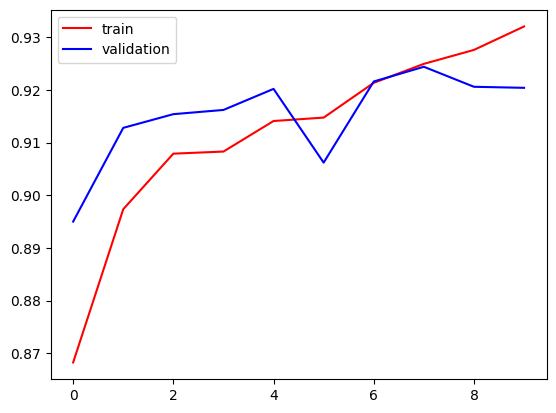

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()